In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
init = tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3,)))

[-0.551604748 -0.801312685 0.155354559]


In [2]:
tf.random.set_seed(42)

class myModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape=(2, 3)), trainable=True)
        self.w2 = tf.Variable(init(shape=(1, 3)), trainable=False)

In [3]:
m = myModule()
print("All module variables: ", [v.shape for v in m.variables])

/home/riri/Desktop/Tensorflow/venv/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


All module variables:  [TensorShape([2, 3]), TensorShape([1, 3])]


In [4]:
print("Trainable variable: ", [v.shape for v in m.trainable_variables])

Trainable variable:  [TensorShape([2, 3])]


 - Computing the gradients of the loss with respect to trainable variables.

In [5]:
w = tf.Variable(1.0)
b = tf.Variable(0.5)

x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])


print(w.trainable, b.trainable)

True True


In [6]:
with tf.GradientTape() as Tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))
dloss_dw = Tape.gradient(loss, w)
tf.print('dL/dW: ', dloss_dw)

dL/dW:  -0.559999764


In [7]:
tf.print(2*x*(w*x+b - y))#Veryfing the computed gradient.

[-0.559999764]


### Solving an XOR classification problem

In [8]:
tf.random.set_seed(1)
np.random.seed(1)

In [9]:
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))

y[x[:, 0] * x[:, 1] < 0] = 0

In [10]:
x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

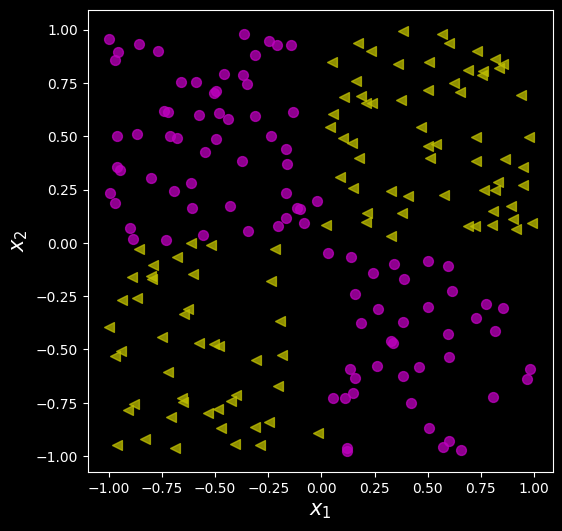

In [11]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x[y==0, 0],
         x[y==0, 1], alpha=0.75, marker='o', s=50, c='m')
plt.scatter(x[y==1, 0],
         x[y==1, 1], alpha=0.75, marker='<', s=50, c='y')
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, 
                                input_shape=(2,),
                                activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [14]:
hist = model.fit(x_train, 
                 y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2,
                 verbose=0)

Text(0.5, 0, 'Epochs')

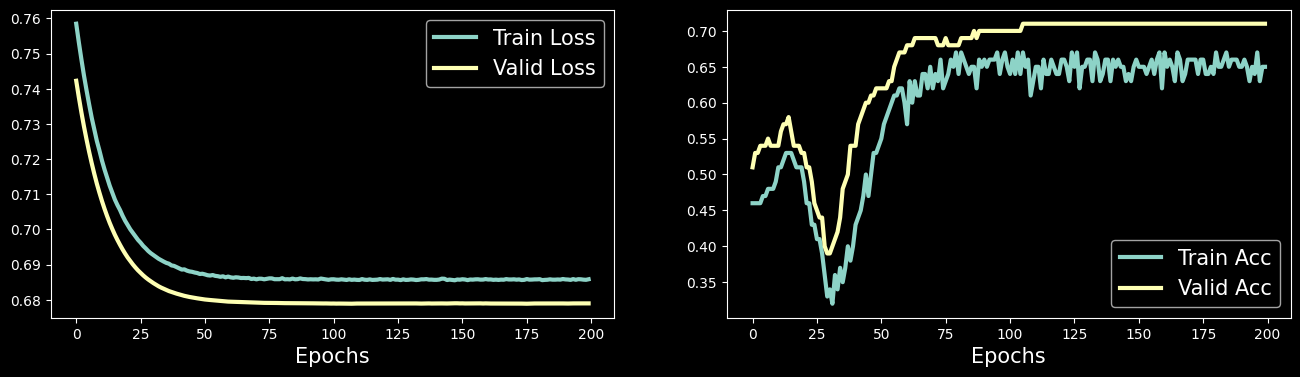

In [15]:
# from mlextextend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history['loss'], lw=3)
plt.plot(history['val_loss'], lw=3)
plt.legend(['Train Loss', 'Valid Loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history['binary_accuracy'], lw=3)
plt.plot(history['val_binary_accuracy'], lw=3)
plt.legend(['Train Acc', 'Valid Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

- One layer, logistic regression is not so efficient as it can only draw a linear oundary between the two classes.
- Add more layers with nonlinear activations.

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 77 (308.00 Byte)
Trainable params: 77 (308.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [18]:
hist = model.fit(x_train, 
                 y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2,
                 verbose=0)

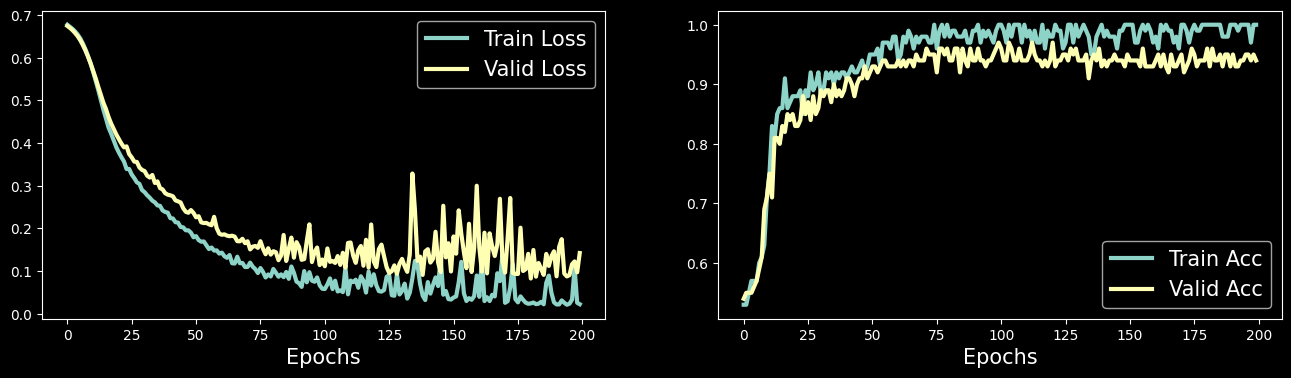

In [19]:
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history['loss'], lw=3)
plt.plot(history['val_loss'], lw=3)
plt.legend(['Train Loss', 'Valid Loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history['binary_accuracy'], lw=3)
plt.plot(history['val_binary_accuracy'], lw=3)
plt.legend(['Train Acc', 'Valid Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# ax = fig.add_subplot(1, 3, 3)
# plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
# ax.set_xlabel(r'$x_1$', size=15)
# ax.xaxis.set_label_coords(1, -0.025)
# ax.set_ylabel(r'$x_2$', size=15)
# ax.yaxis.set_label_coords(-0.025, 1)

plt.show()

### Making model building more flexible with Keras' functional API

In [20]:
#Input layer
inputs = tf.keras.Input(shape=(2, ))

#Hidden layers.
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)

#Output
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

#Build model.
func_model = tf.keras.Model(inputs=inputs, outputs=outputs)

func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 12        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
func_model.compile(optimizer=tf.keras.optimizers.SGD(),
                   loss=tf.keras.losses.BinaryCrossentropy(),
                   metrics=[tf.keras.metrics.BinaryAccuracy()])

In [22]:
hist = func_model.fit(x_train, y_train,
                      validation_data=(x_valid, y_valid),
                      epochs=200, batch_size=2, verbose=0)

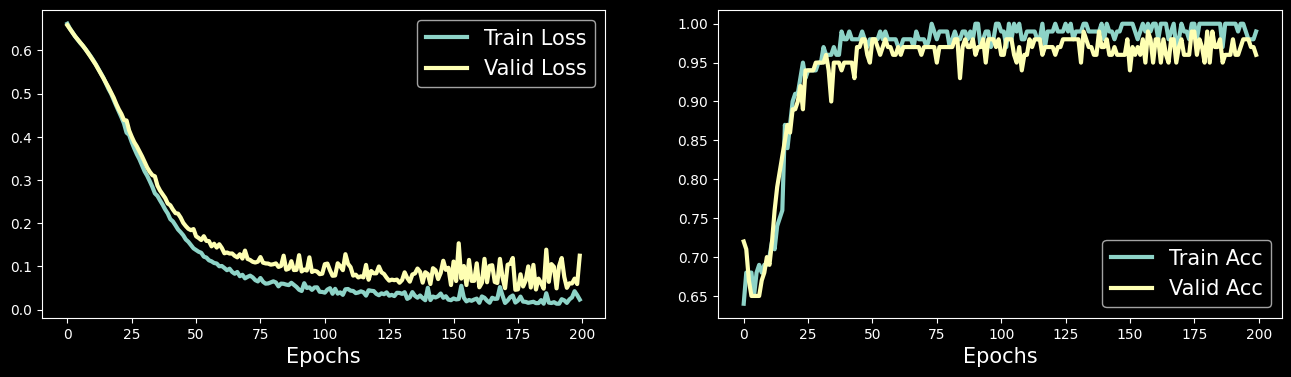

In [23]:
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history['loss'], lw=3)
plt.plot(history['val_loss'], lw=3)
plt.legend(['Train Loss', 'Valid Loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history['binary_accuracy'], lw=3)
plt.plot(history['val_binary_accuracy'], lw=3)
plt.legend(['Train Acc', 'Valid Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# ax = fig.add_subplot(1, 3, 3)
# plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
# ax.set_xlabel(r'$x_1$', size=15)
# ax.xaxis.set_label_coords(1, -0.025)
# ax.set_ylabel(r'$x_2$', size=15)
# ax.yaxis.set_label_coords(-0.025, 1)

plt.show()

### Implementing models based on Keras' Model class.

In [24]:
class customModel(tf.keras.Model):
    def __init__(self):
        super(customModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_2 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_3 = tf.keras.layers.Dense(units=4, activation='relu')
        self.output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')
        
    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)

In [25]:
tf.random.set_seed(1)

classModel = customModel()

classModel.build(input_shape=(None, 2))
classModel.summary()

Model: "custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            multiple                  12        
                                                                 
 dense_11 (Dense)            multiple                  20        
                                                                 
 dense_12 (Dense)            multiple                  20        
                                                                 
 dense_13 (Dense)            multiple                  5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
classModel.compile(optimizer=tf.keras.optimizers.SGD(),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=[tf.keras.metrics.BinaryAccuracy()])

In [27]:
hist = classModel.fit(x_train, y_train,
                      validation_data=(x_valid, y_valid),
                      epochs=200, batch_size=2, verbose=0)

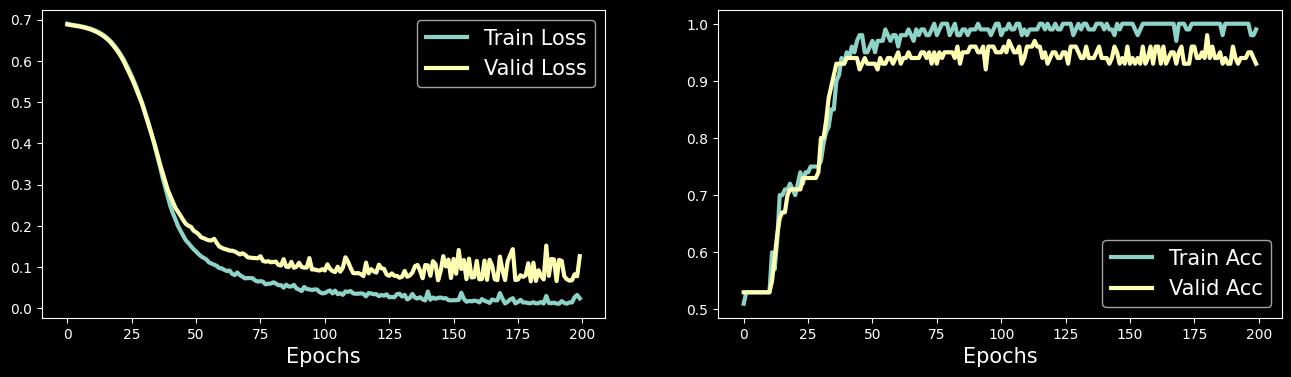

In [28]:
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history['loss'], lw=3)
plt.plot(history['val_loss'], lw=3)
plt.legend(['Train Loss', 'Valid Loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history['binary_accuracy'], lw=3)
plt.plot(history['val_binary_accuracy'], lw=3)
plt.legend(['Train Acc', 'Valid Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# ax = fig.add_subplot(1, 3, 3)
# plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
# ax.set_xlabel(r'$x_1$', size=15)
# ax.xaxis.set_label_coords(1, -0.025)
# ax.set_ylabel(r'$x_2$', size=15)
# ax.yaxis.set_label_coords(-0.025, 1)

plt.show()

### Writing custom Keras layers.
- A new layer called `NoisyLinear`, which implements the computation `𝑤(𝑥 + 𝜖) + 𝑏`.

In [29]:
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
        self.output_dim = output_dim
        self.noise_stdddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.w = self.add_weight(name='weights',
                                  shape=(input_shape[1], self.output_dim),
                                  initializer='random_normal',
                                  trainable=True)
        self.b = self.add_weight(name='bias',
                                 shape=(self.output_dim,),
                                 initializer='zeros',
                                trainable=True)
        
    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(shape=(batch, dim), mean=0.0, stddev=self.noise_stdddev)
            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w) + self.b
        return tf.keras.activations.relu(z)
    
    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'output_dim': self.output_dim,
                       'noise_stddev': self.noise_stdddev})
        
        return config


In [30]:
tf.random.set_seed(1)
noisyLayer = NoisyLinear(4)
noisyLayer.build(input_shape=(None, 4))

In [31]:
x = tf.zeros(shape=(1, 4))
tf.print(noisyLayer(x, training=True))

[[0.00164129515 0 0 0.00347896549]]


In [32]:
#rebuilding from config.
config = noisyLayer.get_config()
newLayer = NoisyLinear.from_config(config)
tf.print(newLayer(x, training=True))

[[0 0 0 0]]


In [33]:
model = tf.keras.Sequential([
    NoisyLinear(4, noise_stddev=0.1),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')])

model.build(input_shape=(None, 2))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 noisy_linear_1 (NoisyLinea  (None, 4)                 12        
 r)                                                              
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
               loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=[tf.keras.metrics.BinaryAccuracy()])

In [35]:
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

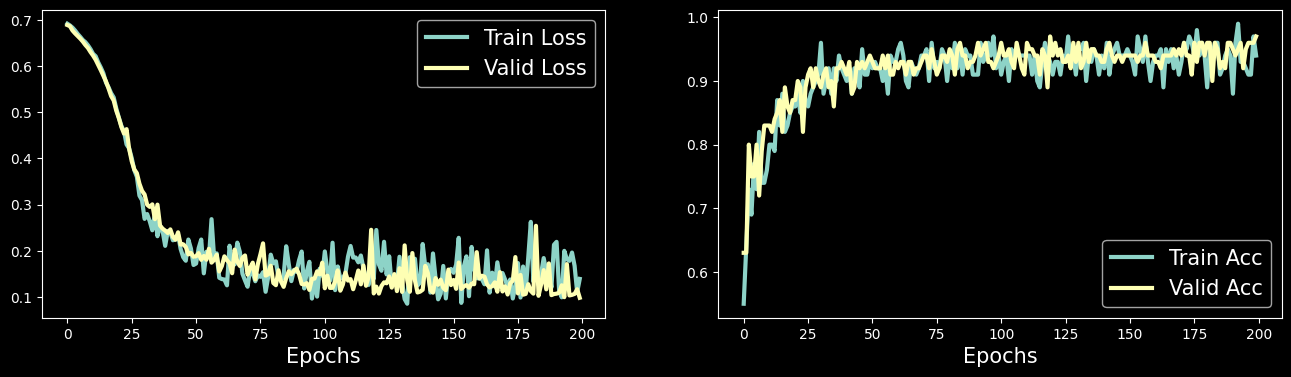

In [36]:
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history['loss'], lw=3)
plt.plot(history['val_loss'], lw=3)
plt.legend(['Train Loss', 'Valid Loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history['binary_accuracy'], lw=3)
plt.plot(history['val_binary_accuracy'], lw=3)
plt.legend(['Train Acc', 'Valid Acc'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# ax = fig.add_subplot(1, 3, 3)
# plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer), clf=model)
# ax.set_xlabel(r'$x_1$', size=15)
# ax.xaxis.set_label_coords(1, -0.025)
# ax.set_ylabel(r'$x_2$', size=15)
# ax.yaxis.set_label_coords(-0.025, 1)

plt.show()